**Question 1: Perform the following tasks:**

● Create a pairplot to visualize relationships between multiple numerical variables.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

##**Question 1:**

In [ ]:
df = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**Missing value:**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##**PairPlot:**

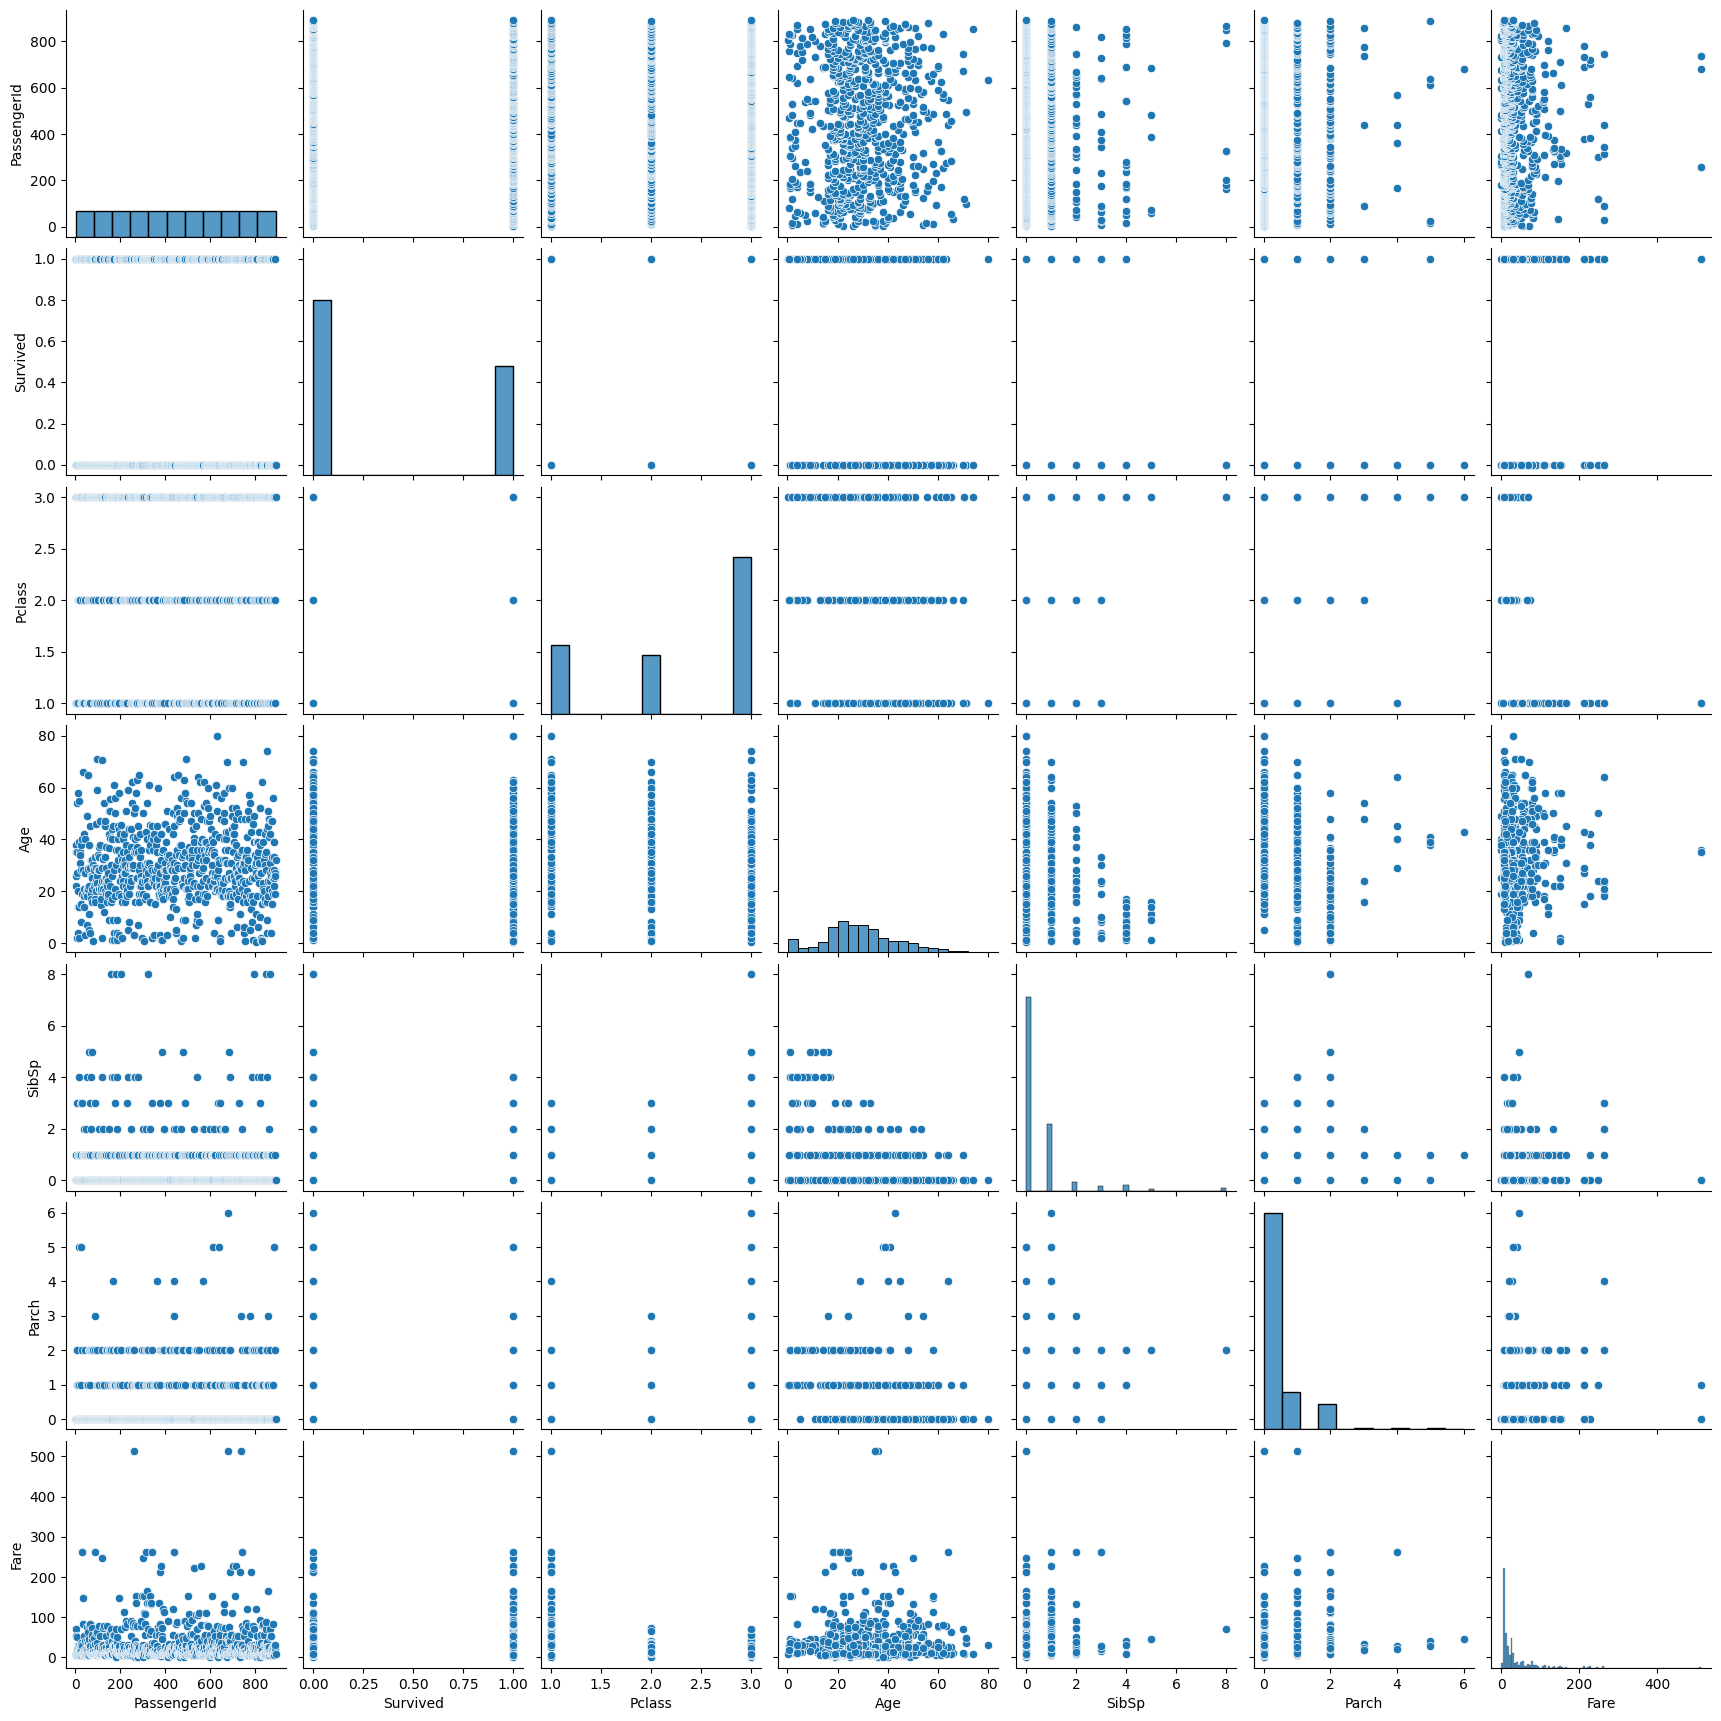

In [ ]:
sns.pairplot(df)
plt.show()

## **HeatMap:**

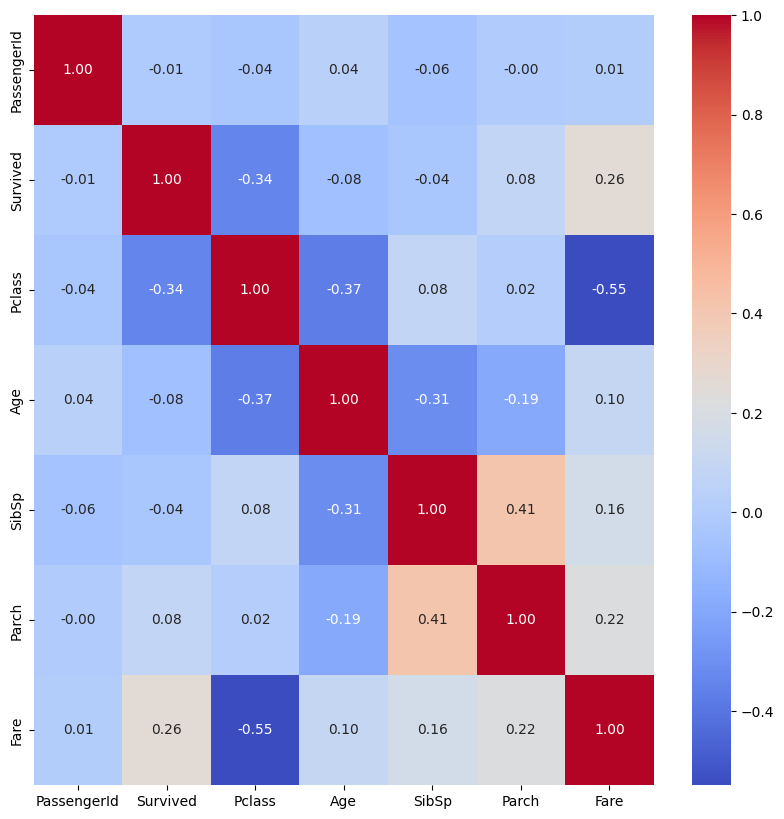

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, fmt=".2f")
plt.show()

##**Missing Data: Heatmap**

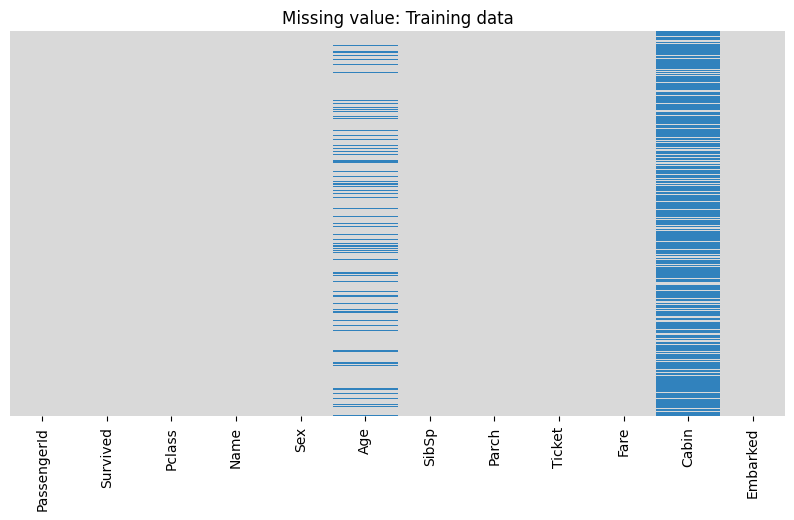

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.title("Missing value: Training data")
plt.show()

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True)

###**Identify and print pairs of variables with the highest and lowest correlation coefficients**

In [ ]:
corr_matrix = df.corr()
max_corr = corr_matrix.unstack().sort_values().drop_duplicates().iloc[-2:]
min_corr = corr_matrix.unstack().sort_values().drop_duplicates().iloc[:2]

print("Pair with highest correlation coefficients: ")
for pair, correlation in max_corr.items():
  print(f"{pair} : {correlation}")

print("\nPair with lowest correlation coefficients: ")
for pair, correlation in min_corr.items():
  print(f"{pair} : {correlation}")


Pair with highest correlation coefficients: 
('SibSp', 'Parch') : 0.41483769862015624
('PassengerId', 'PassengerId') : 1.0

Pair with lowest correlation coefficients: 
('Pclass', 'Fare') : -0.5494996199439076
('Pclass', 'Age') : -0.36922601531551735


##**Question 2:**

Explore the Netflix dataset to understand the distribution of movies vs. TV shows, identify the
countries producing the most content, and analyze the trend of releases over the years. What genres
are most common, and how does the rating distribution vary across genres?

In [ ]:
netflix_data = pd.read_csv('/content/netflix_titles[1].csv')

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##Removing null values

In [ ]:
netflix_data = netflix_data.dropna()
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


##Checking the rating of movies

In [ ]:
df_movie = netflix_data[netflix_data["type"] == 'Movie']
movie_rating = df_movie['rating'].value_counts()
print("Rating of movies:\n", movie_rating)

Rating of movies:
 TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64


Most of the movies rated as TV-MA, TV-14 and R


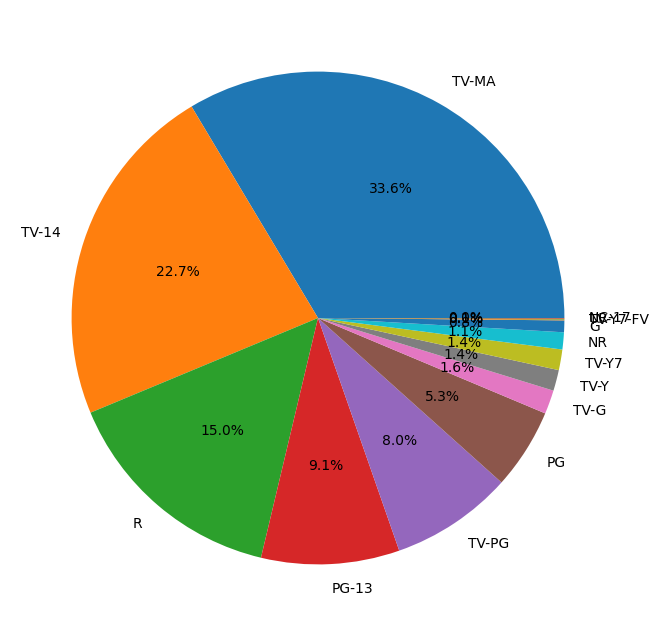

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.pie(movie_rating, labels=movie_rating.index, autopct="%1.1f%%", )
plt.show()

##TV shows rating:

In [ ]:
df_TVshows = netflix_data[netflix_data["type"] == 'TV Show']
TVshows_rating = df_TVshows['rating'].value_counts()
print("Rating of TV shows:\n", TVshows_rating)

Rating of TV shows:
 TV-MA    81
TV-14    37
TV-PG    15
TV-Y7     6
TV-Y      5
TV-G      3
Name: rating, dtype: int64


Most of the tv shows rated as TV-Ma and TV-14

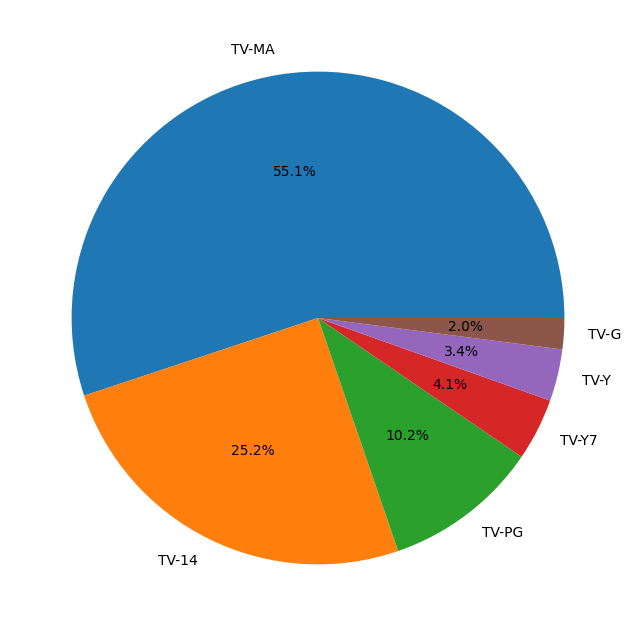

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.pie(TVshows_rating, labels=TVshows_rating.index, autopct="%1.1f%%")
plt.show()

##Analyze the trend of releases over the years

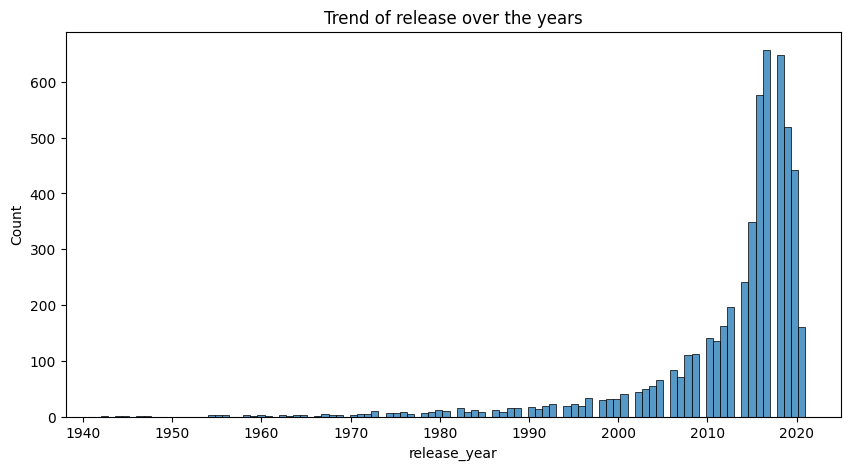

In [ ]:
sns.histplot(netflix_data['release_year'], kde=False)
plt.title("Trend of release over the years")
plt.show()

##Top ten countries with most content:

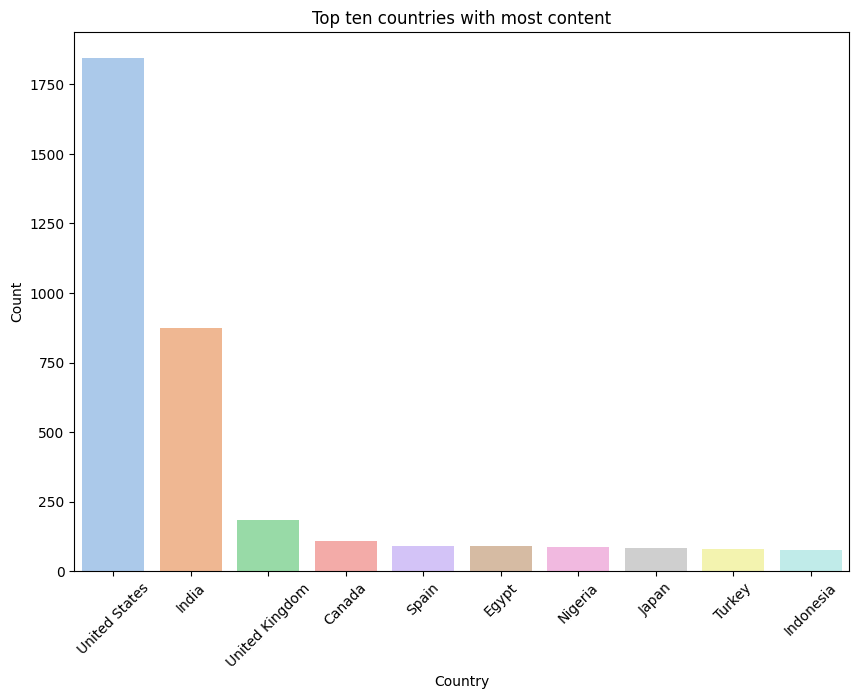

In [ ]:
top10countries = netflix_data['country'].value_counts().head(10)

fig = plt.figure(figsize=(10, 7))
sns.barplot(x=top10countries.index, y=top10countries.values, palette = 'pastel')
plt.title("Top ten countries with most content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##Identify and distribute most common genres:

In [ ]:
#identify the most common genre
all_genres = ",".join(netflix_data['listed_in']).split(",")
top_genre = pd.Series(all_genres).value_counts().reset_index(name="count")


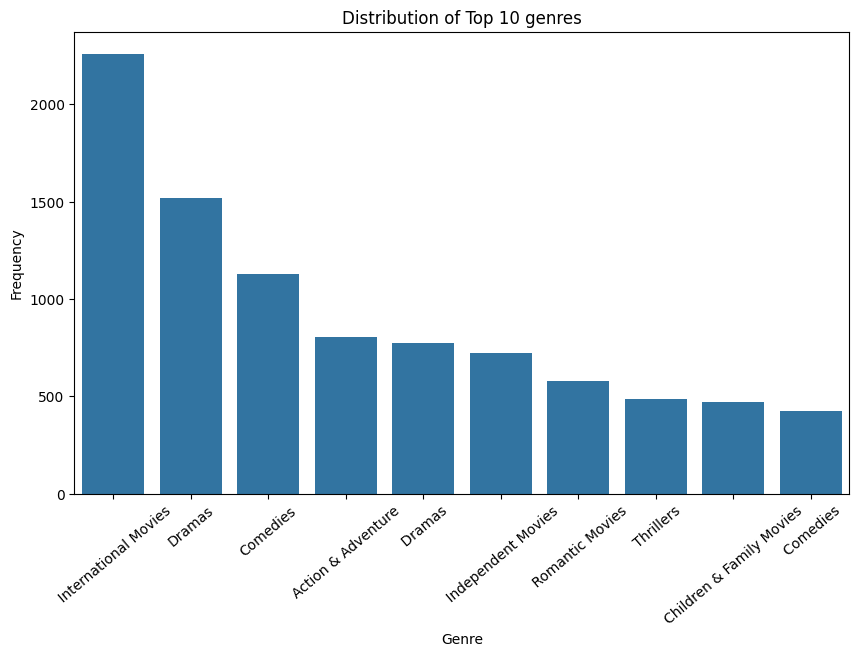

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='count', data=top_genre.head(10))
plt.title('Distribution of Top 10 genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=40)
plt.show()

##**Question 3:**

Conduct an exploratory data analysis on the **Melbourne
Housing Market dataset**. Identify trends in
housing prices over time, analyze the impact of location, and explore the relationship between
property attributes (such as the number of rooms, type of property, and land size) and price.


In [ ]:
#Load dataset and print first five rows
housing_data = pd.read_csv('/content/Melbourne_housing_FULL[1].csv')
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
housing_data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
housing_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


##Handling missing values:

In [ ]:
housing_data['Landsize'] = housing_data['Landsize'].fillna(housing_data['Landsize'].mean())
housing_data['BuildingArea'] = housing_data['BuildingArea'].fillna(housing_data['BuildingArea'].mean())
housing_data['Bathroom'] = housing_data['Bathroom'].fillna(2)

# Imputation function
def imput_bedroom(cols):
    Bedroom2 = cols[0]
    Rooms = cols[1]

    if pd.isnull(Bedroom2):

        if Rooms <= 1:
            return 0

        elif Rooms == 2:
            return 2

        elif Rooms == 3:
            return 3

        else :
            return 4

    else :
        return Bedroom2

# Applying imputation function
housing_data['Bedroom2'] = housing_data[['Bedroom2', 'Rooms']].apply(imput_bedroom, axis=1)


In [ ]:
housing_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car               8728
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,34857.000000,34857.000000,26129.000000,34857.000000,34857.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,2.992828,1.713343,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,1.001809,0.652754,1.010771,2763.694121,251.943934,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,357.000000,160.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,593.598993,160.256400,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,598.000000,160.256400,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


Drop null values




In [ ]:
housing_data.dropna(inplace=True)

In [ ]:
housing_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
housing_data.shape

(11880, 21)

##Drop unnecessary columns:

In [ ]:
housing_data.drop(['Address', 'Car', 'Regionname', 'CouncilArea', 'Date'], axis=1, inplace=True)

In [ ]:
housing_data = pd.get_dummies(housing_data, drop_first=True)
#housing_data = pd.concat([housing_data[numeric_column], one_hot_encoded_cols], axis=1 )
housing_data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,...,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_hockingstuart/Advantage,SellerG_hockingstuart/Biggin,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK
2,2,1035000.0,2.5,3067.0,2.0,1.0,156.0,79.0,1900.0,-37.8079,...,0,0,0,0,0,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,134.0,150.0,1900.0,-37.8093,...,0,0,0,0,0,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,120.0,142.0,2014.0,-37.8072,...,0,0,0,0,0,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,245.0,210.0,1910.0,-37.8024,...,0,0,0,0,0,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,256.0,107.0,1890.0,-37.8060,...,0,0,0,0,0,0,0,0,0,0


Histogram plot: Price

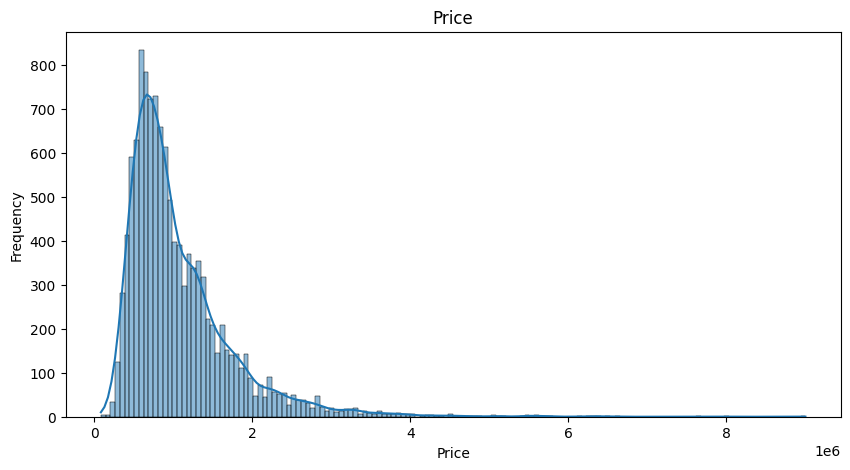

In [ ]:
plt.figure()
sns.histplot(housing_data['Price'], kde=True )
plt.title(f"Price")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
housing_data.shape

(11880, 616)

In [ ]:
housing_data.head(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,...,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_hockingstuart/Advantage,SellerG_hockingstuart/Biggin,SellerG_hockingstuart/Village,SellerG_hockingstuart/hockingstuart,SellerG_iOne,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK
2,2,1035000.0,2.5,3067.0,2.0,1.0,156.0,79.0,1900.0,-37.8079,...,0,0,0,0,0,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,134.0,150.0,1900.0,-37.8093,...,0,0,0,0,0,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,120.0,142.0,2014.0,-37.8072,...,0,0,0,0,0,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,245.0,210.0,1910.0,-37.8024,...,0,0,0,0,0,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,256.0,107.0,1890.0,-37.8060,...,0,0,0,0,0,0,0,0,0,0
18,2,1097000.0,2.5,3067.0,3.0,1.0,220.0,75.0,1900.0,-37.8010,...,0,0,0,0,0,0,0,0,0,0
24,3,1350000.0,2.5,3067.0,3.0,2.0,214.0,190.0,2005.0,-37.8085,...,0,0,0,0,0,0,0,0,0,0
25,2,750000.0,2.5,3067.0,2.0,2.0,0.0,94.0,2009.0,-37.8078,...,0,0,0,0,0,0,0,0,0,0
30,2,1310000.0,2.5,3067.0,2.0,1.0,238.0,97.0,1890.0,-37.8090,...,0,0,0,0,0,0,0,0,0,0
32,3,1200000.0,2.5,3067.0,3.0,2.0,113.0,110.0,1880.0,-37.8056,...,0,0,0,0,0,0,0,0,0,0


Duplicate rows shape is :

In [ ]:
duplicate_rows = housing_data[housing_data.duplicated()]
print(duplicate_rows.shape)

(17, 616)


Drop duplicate rows

In [ ]:
housing_data = housing_data.drop_duplicates()

Training data shape is :

In [ ]:
print(f"training data shape", housing_data.shape)

training data shape (11863, 616)


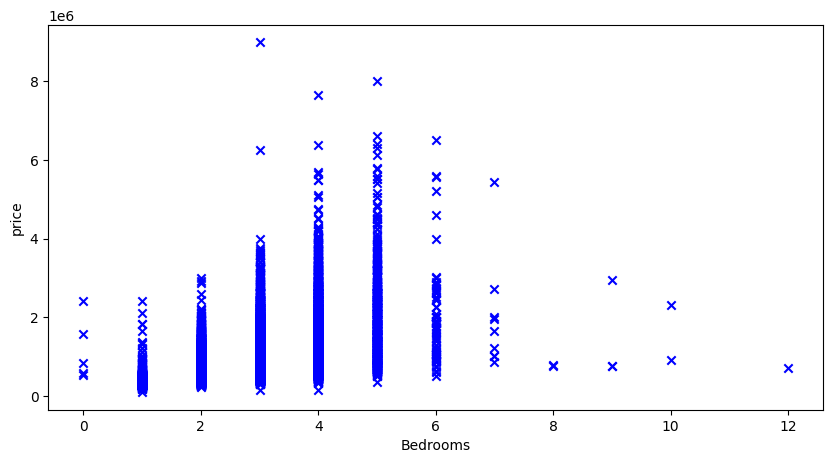

In [ ]:
plt.xlabel('Bedrooms')
plt.ylabel('price')
plt.scatter(housing_data['Bedroom2'],housing_data['Price'],color='blue',marker='x')

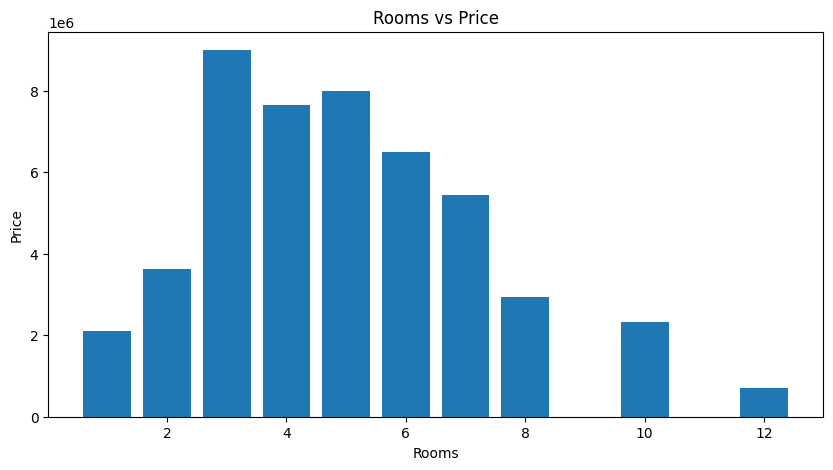

In [ ]:
plt.bar(housing_data['Rooms'], housing_data['Price'])
plt.title("Rooms vs Price")
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()


In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(data=housing_data, y='Price')
#plt.ylabel('Price')
#plt.title('Boxplot of Price')
plt.show()

##Barplot : YearBuilt vs Price

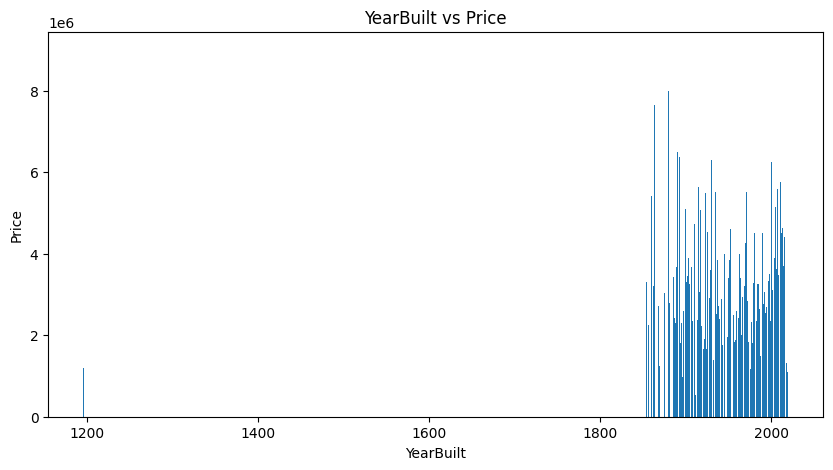

In [ ]:
plt.bar(housing_data['YearBuilt'], housing_data['Price'])
plt.title("YearBuilt vs Price")
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.show()

##Scatterplot :   Price vs Landsize

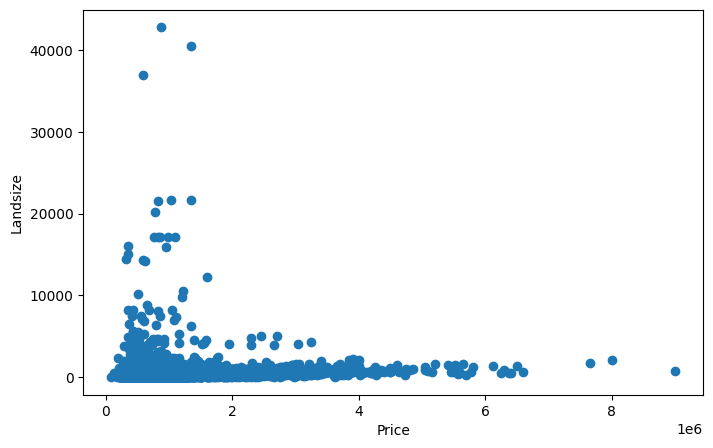

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(housing_data['Price'], housing_data['Landsize'])
plt.xlabel('Price')
plt.ylabel('Landsize')
plt.show()

##Barplot : Year Built vs Price

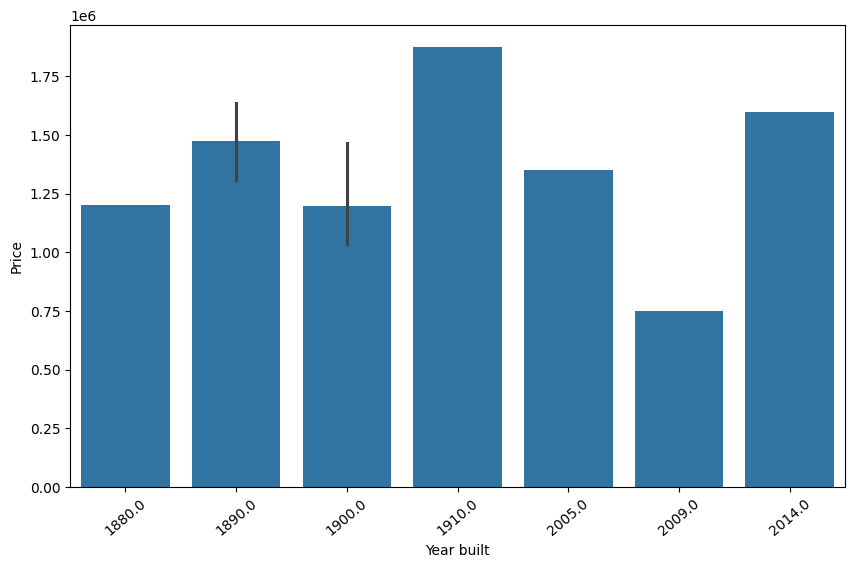

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='YearBuilt', y='Price', data=housing_data.head(10))
plt.xlabel('Year built')
plt.ylabel('Price')
plt.xticks(rotation=40)
plt.show()

##**Question 4:**

In [ ]:
#load dataframe
data = sns.load_dataset('taxis')

Analyze and describe the data by .head(), .shape , .describe() etc

In [ ]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


The dataset have 6433 rows and 14 column:

In [ ]:
data.shape

(6433, 14)

In [ ]:
data.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [ ]:
data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Dropping null values from data

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

The shape of dataframe without null values is 6341 rows and 14 column:

In [ ]:
data.shape

(6341, 14)

##**Histogram plot: Fare**

###It shows that most of the fare ranges between 5 to 20

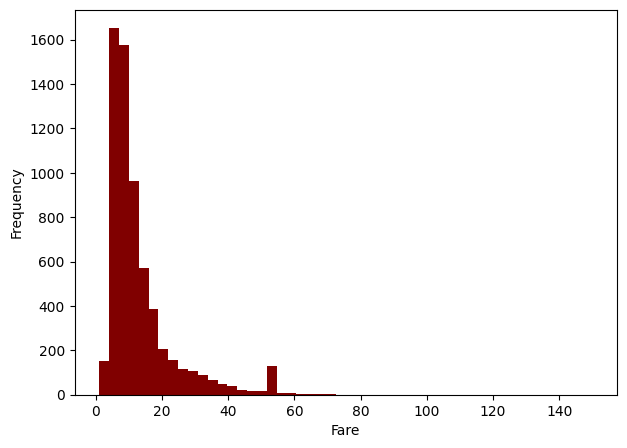

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(data['fare'], bins=50, color='maroon')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

###**Bar plot : Passanger vs fare**

###Most of the fare is paid by two passengers.

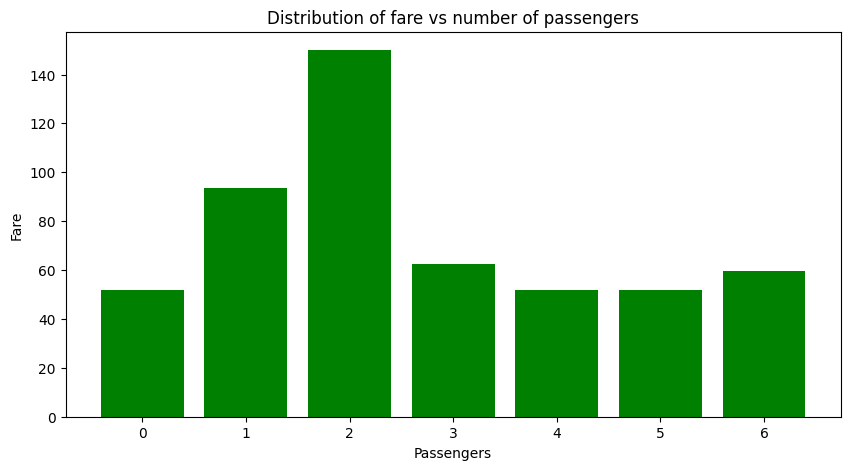

In [ ]:
plt.bar(data['passengers'], data['fare'], color='green')
plt.title('Distribution of fare vs number of passengers')
plt.xlabel('Passengers')
plt.ylabel('Fare')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x="", y="", hue="Pclass", data=full_data)
plt.show()

###**Question 5:**

Perform Data Cleaning and Exploration using Pandas:

In [ ]:
titanic_data = pd.read_csv("/content/titanic_dataset.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop the Cabin column because of null values and lack of significance for the analysis

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace=True)

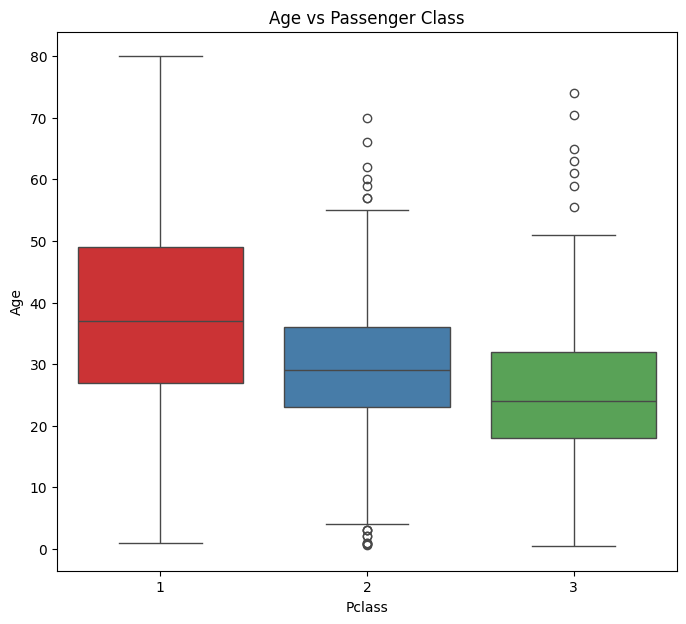

In [ ]:
plt.figure(figsize = (8,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data, palette= 'Set1').set_title('Age vs Passenger Class')
plt.show()

Compute the age according to the above plot:

Pclass 1 have 38 median age

Pclass 2 have 29 median age

Pclass 3 have 25 median age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

titanic_data['Age']=titanic_data[['Age','Pclass']].apply(impute_age, axis =1 )

Removing unnecessary column:

In [ ]:
titanic_data.drop(['Name','Ticket'], axis = 1, inplace = True)

Perform one hot encoding to change the object to int

In [ ]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

titanic_data = pd.concat([titanic_data, sex, embarked], axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex,...,Sex,Sex,Sex,Sex,Sex,Sex,Sex,Sex_male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1


Drop object columns

In [ ]:
titanic_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex_male,Embarked_Q,Embarked_S,Sex_male,Embarked_Q,Embarked_S,Sex_male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,1,0,1,1,0,1


Scatter Plot : Pclass vs Fare

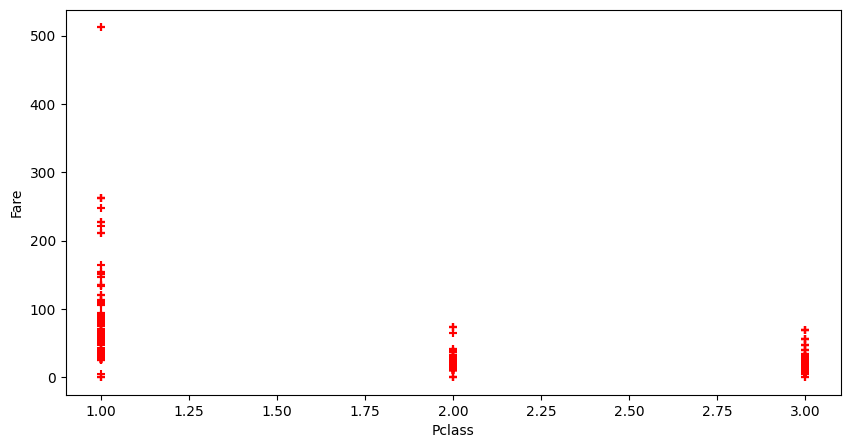

In [ ]:
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.scatter(titanic_data['Pclass'],titanic_data['Fare'],color='red',marker='+')